In [2]:
# !pip install -r requirements.txt -q
# !pip install ipython-autotime -q

time: 6.87 s (started: 2024-11-23 13:38:28 +00:00)


In [4]:
import ta
import yfinance as yf
import numpy as np
import pandas as pd
import joblib
from joblib import Parallel, delayed
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autotime

# Download historical price data for a stock
tickers = ['AAPL', 'AMZN', 'GME', 'GOOGL', 'NFLX', 'TSLA', 'MSFT', 'NVDA', 'AMD', 'CRM', 'JPM', 'V', 'MA', 'MSTR', 'DIS', 
           'BA', 'XOM', 'ORCL', 'META', 'BRK', 'HSBC', 'MS', 'PYPL', 'BAC', 'BLK', 'GS']

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.77 ms (started: 2024-11-23 14:08:16 +00:00)


In [5]:
def save_processed_data(processed_dfs='', values_list='', output_dir='processed_data'):
    """
    Save processed DataFrames list and numpy arrays list to single files
    """
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Save list of DataFrames using pickle
    with open(output_path / 'processed_dfs.pkl', 'wb') as f:
        joblib.dump(processed_dfs, f)
    
    # Save numpy arrays
    with open(output_path / 'values_array.pkl', 'wb') as f:
        joblib.dump(values_list, f)

def load_processed_data(data_dir='processed_data'):
    """
    Load processed DataFrames list and numpy arrays from files
    """
    data_path = Path(data_dir)
    
    # Load list of DataFrames
    with open(data_path / 'processed_dfs.pkl', 'rb') as f:
        processed_dfs = joblib.load(f)
    
    # Load numpy arrays
    with open(data_path / 'values_array.pkl', 'rb') as f:
        values_list = joblib.load(f)
    
    return processed_dfs, values_list

# Save both lists
# save_processed_data(combined_dfs, combined_values, 'processed_data')

# Later load them
dfs_list, values_list = load_processed_data('processed_data')

time: 99.8 ms (started: 2024-11-23 14:08:17 +00:00)


In [6]:
dfs_list[0]

Price,Adj Close,Close,High,Low,Open,Volume,RSI,WR,Price Momentum,Volume Momentum,...,Lower Band,Ulcer Index,Fourier Power,Fourier Phase,Fourier 3 Real,Fourier 6 Real,Fourier 9 Real,Fourier 100 Real,Fourier Significant real,Close Next Day
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-23,10.218667,12.113929,12.150714,11.998214,12.117143,1000000.0,45.129882,-63.484871,-0.005891,0.144432,...,11.771967,4.863905,2111.334350,1.392614,76.392495,51.985778,28.238596,13.803875,57.162874,10.392805
2011-03-24,10.392805,12.320357,12.357143,12.102143,12.208929,1000000.0,49.916460,-47.161812,0.017041,0.085029,...,11.778443,4.925602,2134.212905,1.789320,76.122099,51.443870,27.594235,14.532931,56.657213,10.590734
2011-03-25,10.590734,12.555000,12.573571,12.393571,12.431071,1000000.0,54.748644,-18.818231,0.019045,0.109209,...,11.780896,4.902553,1839.287828,1.943577,75.851917,50.904061,26.956050,15.176440,56.153055,10.557595
2011-03-28,10.557595,12.515714,12.654286,12.515714,12.612500,1000000.0,53.812478,-19.986852,-0.003129,-0.310875,...,11.781116,4.878158,1315.513538,2.037743,75.581952,50.366372,26.324077,15.715188,55.650416,10.573259
2011-03-29,10.573259,12.534286,12.534286,12.359286,12.416429,1000000.0,54.211076,-18.266099,0.001484,0.140762,...,11.782105,4.850004,1206.374877,2.010800,75.312206,49.830824,25.698351,16.133638,55.149313,10.503066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-24,230.316620,230.570007,230.820007,228.410004,229.979996,1000000.0,52.271541,-42.821761,-0.000823,-0.405024,...,222.290882,2.031275,21857.804244,-1.509946,105.115706,115.104123,117.980892,188.509112,114.330593,231.155685
2024-10-25,231.155685,231.410004,233.220001,229.570007,229.740005,1000000.0,53.621399,-42.696626,0.003643,0.247281,...,222.507266,1.664750,30163.314500,-1.569032,104.839212,114.481354,117.032685,177.737174,113.773702,233.143494


time: 21.7 ms (started: 2024-11-23 14:08:18 +00:00)


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days and Bollinger Bands')

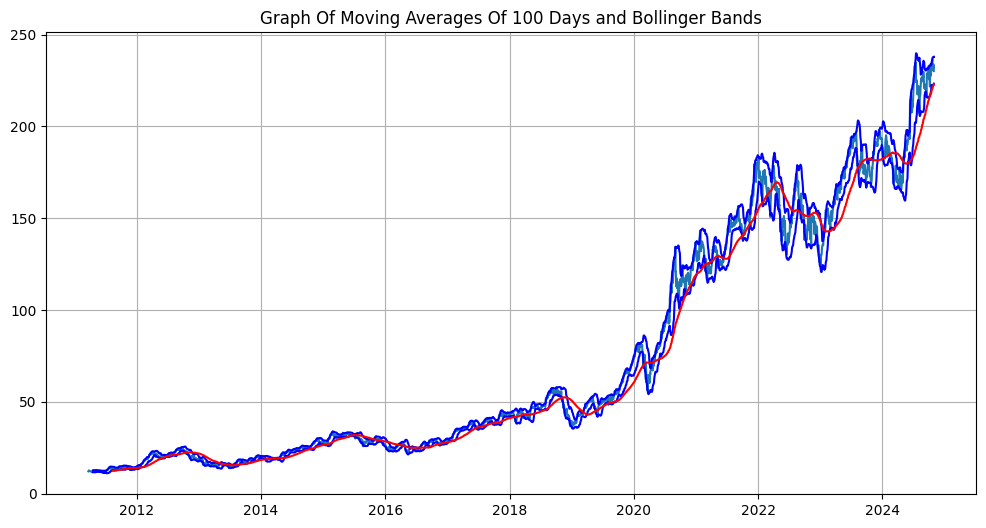

time: 241 ms (started: 2024-11-23 13:50:06 +00:00)


In [13]:
aapl_close = dfs_list[0]["Close"].squeeze() 
ma100 = aapl_close.rolling(100).mean()

BB = ta.volatility.BollingerBands(aapl_close, window=20)
high_band = BB.bollinger_hband()
low_band = BB.bollinger_lband()
    
plt.figure(figsize = (12,6))
plt.plot(aapl_close)
plt.plot(high_band, 'b')
plt.plot(low_band, 'b')
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days and Bollinger Bands')

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


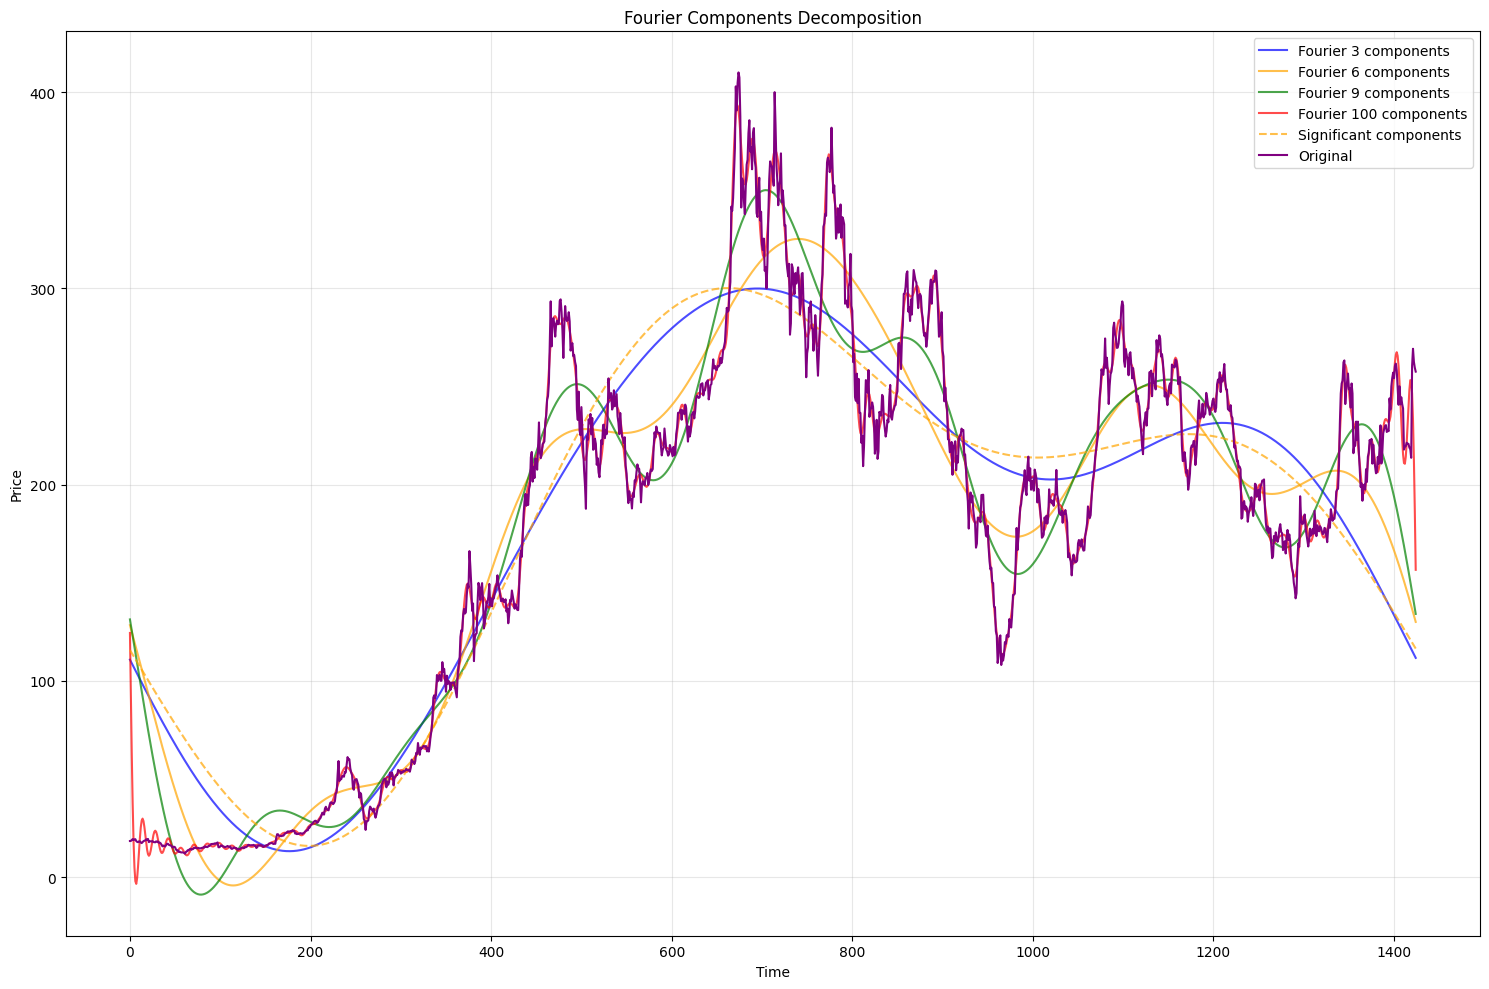

time: 325 ms (started: 2024-11-23 13:50:06 +00:00)


In [14]:
def plot_fourier_components(stock_data, figsize=(15, 10)):
    """
    Plot real parts of Fourier components and significant components
    
    Args:
        stock_data (pd.DataFrame): DataFrame containing stock price data with Close column
        figsize (tuple): Figure size for the plot
    """
    # Get close prices
    close_prices = stock_data["Close"].squeeze()
    
    # Calculate FFT
    close_fft = np.fft.fft(np.asarray(close_prices.tolist()))
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Plot Fourier components
    components = [3, 6, 9, 100]
    colors = ['blue', 'orange', 'green', 'red']
    
    for num_, color in zip(components, colors):
        # Filter FFT
        fft_filtered = np.copy(close_fft)
        fft_filtered[num_:-num_] = 0
        
        # Inverse FFT and get real part
        ifft_signal = np.fft.ifft(fft_filtered)
        
        plt.plot(ifft_signal, 
                label=f'Fourier {num_} components', 
                alpha=0.7,
                color=color)
    
    # Add significant components
    magnitude_threshold = 0.1 * np.max(np.abs(close_fft))
    significant_fft = np.copy(close_fft)
    significant_fft[np.abs(significant_fft) < magnitude_threshold] = 0
    ifft_significant = np.fft.ifft(significant_fft)
    
    plt.plot(ifft_significant, 
            label='Significant components', 
            alpha=0.7,
            color='orange',
            linestyle='--')
    
    # Plot original data
    plt.plot(close_prices.values, label='Original', color='purple')
    
    plt.title('Fourier Components Decomposition')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt

plot_fourier_components(dfs_list[5][2000:])
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

series = dfs_list[0].iloc[:, 0]
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     ('Adj Close', 'AAPL')   No. Observations:                 3425
Model:                    ARIMA(5, 1, 0)   Log Likelihood               -6546.933
Date:                   Sat, 23 Nov 2024   AIC                          13105.866
Time:                           14:09:25   BIC                          13142.697
Sample:                                0   HQIC                         13119.025
                                  - 3425                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0170      0.009     -1.839      0.066      -0.035       0.001
ar.L2         -0.0251      0.010     -2.503      0.012      -0.045      -0.005
ar.L3         -0.0254      0

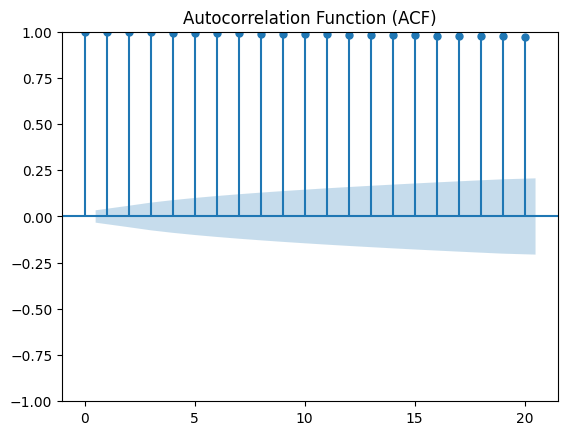

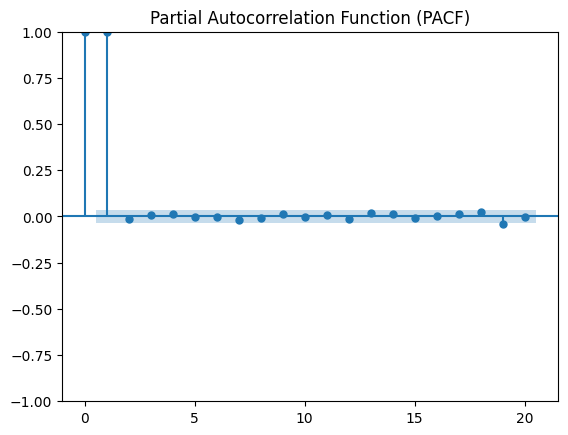

time: 350 ms (started: 2024-11-23 14:09:25 +00:00)


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Plot ACF and PACF to identify p, d, q
plot_acf(series, lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plot_pacf(series, lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

# """
# Based on your ACF and PACF plots:

# From the ACF Plot:

# The ACF shows high and persistent autocorrelations, indicating non-stationarity.
# This suggests you need first-order differencing (d=1) to make the series stationary.
# From the PACF Plot:

# The PACF cuts off sharply after lag 2, with only the first two lags being significant.
# This suggests that the series has an AR (autoregressive) component with p=2.

# p=2: From the PACF plot.
# d=1: To account for non-stationarity observed in the ACF plot.
# q=0: Since the ACF does not show a distinct cutoff, there's no strong indication of a Moving Average (MA) component.
# Thus, the best order to start with is ARIMA(2, 1, 0).
# """

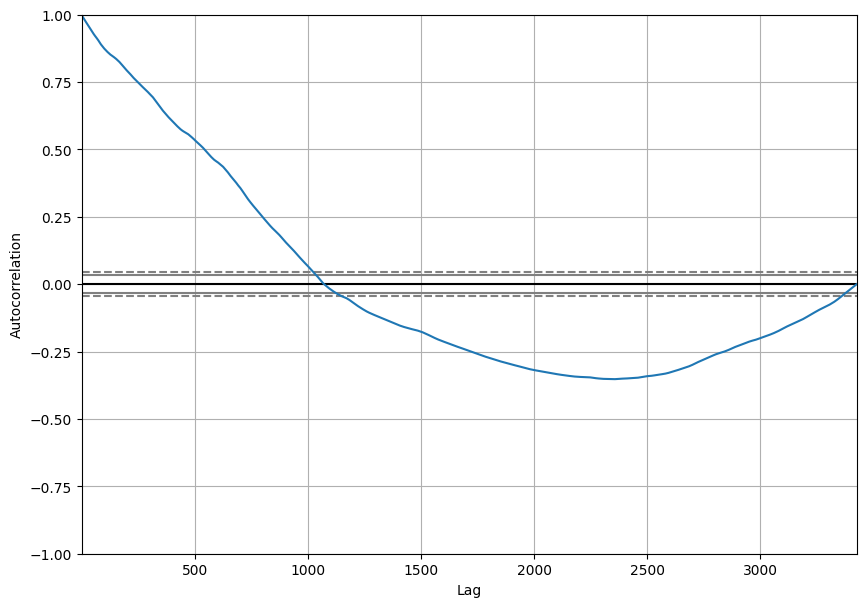

time: 198 ms (started: 2024-11-23 14:09:25 +00:00)


In [10]:
plt.figure(figsize=(10, 7), dpi=100)
autocorrelation_plot(series)
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error

X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

time: 2min 41s (started: 2024-11-23 14:09:26 +00:00)


In [14]:
full_predictions = np.array([np.nan] * len(train) + predictions)
dfs_list[0]["ARIMA"] = predictions

# # Count NaN values in each column
# nan_counts = dfs_list[0].isna().sum()

# print(nan_counts)

ValueError: Length of values (685) does not match length of index (3425)

time: 44.6 ms (started: 2024-11-23 14:15:22 +00:00)


In [ ]:
error = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % error)

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on AAPLE stock')
plt.legend()
plt.show()

In [44]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


X = dfs_list[0].drop('Close Next Day', axis=1)  # Replace 'target' with your actual target variable name
y = dfs_list[0]['Close Next Day']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test_results = dict(zip(['Lagrange multiplier statistic', 'p-value', 'f-statistic', 'f p-value'], bp_test))

print(bp_test_results)

{'Lagrange multiplier statistic': 660.6320137069778, 'p-value': 1.6059342272317494e-120, 'f-statistic': 29.187344245831426, 'f p-value': 2.5519575109983e-136}
time: 305 ms (started: 2024-11-22 12:48:22 +00:00)


/tmp/ipykernel_238/709620707.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = dfs_list[0].drop('Close Next Day', axis=1)  # Replace 'target' with your actual target variable name
